In [1]:
import seaborn as sns
import pandas as pd
from os import listdir
from os.path import join
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

In [2]:
INSTR_CYCLE = 'Instruction throughput\n[instructions per cycle per core]'
DC_CYCLE = 'Data Cache access rate\n[data cache accesses per cycle per core]'
POWER = 'Power [W]'
folder_to_cache_level_dict = {'reg': 'No access',
                              'l1': 'Level 1',
                              'l2': 'Level 2',
                              'l3': 'Level 3',
                              'ram': 'Main memory'}
CATEGORIES = list(folder_to_cache_level_dict.values())

In [3]:
def strip_or_change_dtype(lst):
    for i in range(len(lst)):
        lst[i] = lst[i].strip('"')
        try:
            lst[i] = int(lst[i])
        except:
            try:
                lst[i] = float(lst[i])
            except:
                pass
    return lst

In [4]:
path = 'datafiles'
folders = listdir(path)

plot_df = pd.DataFrame()

for folder in folders:
    with open(join(path, folder, 'firestarter.csv')) as file:
        csv = file.read().split('\n')[-7:-1]
        csv = list(map(lambda s: s.split(','), csv))
        keys, data = csv[0], list(map(strip_or_change_dtype, csv[1:]))
        for values in data:
            d = dict(zip(keys, values))
            if d['metric'] != 'metricq':
                continue
            else:
                d['metric'] = POWER
            plot_df = plot_df.append({'name': d['metric'], 'value': float(d['average']), 'cache': folder_to_cache_level_dict[folder]}, ignore_index=True)
            
    with open(join(path, folder, 'perf.data')) as file:
        csv = file.read().split('\n')[2:-1]
        csv = list(map(lambda s: s.split('!'), csv))
        keys = ['value', 'unit', 'name', 'runtime', 'percentage', 'optional_value', 'optional_name']
        for values in csv:
            d = dict(zip(keys, values))
            plot_df = plot_df.append({'name': d['name'], 'value': float(d['value']), 'cache': folder_to_cache_level_dict[folder]}, ignore_index=True)

plot_df = plot_df.set_index(['cache', 'name'])
                
plot_df

value
cache       name                                              
Level 2     Power [W]                             2.961630e+02
            ls_dc_accesses                        2.140523e+13
            fp_ret_sse_avx_ops.sp_mult_add_flops  1.674518e+14
            instructions                          4.438221e+13
            cpu-cycles                            2.346247e+13
Level 1     Power [W]                             2.854150e+02
            ls_dc_accesses                        2.707740e+13
            fp_ret_sse_avx_ops.sp_mult_add_flops  1.628418e+14
            instructions                          4.100533e+13
            cpu-cycles                            2.351945e+13
Level 3     Power [W]                             3.358780e+02
            ls_dc_accesses                        2.147216e+13
            fp_ret_sse_avx_ops.sp_mult_add_flops  1.421637e+14
            instructions                          4.312801e+13
            cpu-cycles                            2.367080e+13
No access   Power [W]                             2.353280e+02
            ls_dc_accesses                        2.633253e+10
            fp_ret_sse_avx_ops.sp_mult_add_flops  1.869592e+14
            instructions                          4.685913e+13
            cpu-cycles                            2.350181e+13
Main memory Power [W]                             4.372970e+02
            ls_dc_accesses                        1.803810e+13
            fp_ret_sse_avx_ops.sp_mult_add_flops  1.398776e+14
            instructions                          3.955085e+13
            cpu-cycles                            2.341158e+13

In [5]:
instr_per_cycle = plot_df.xs('instructions', level=1) / plot_df.xs('cpu-cycles', level=1) * 2
instr_per_cycle['name'] = INSTR_CYCLE
instr_per_cycle = instr_per_cycle.reset_index().set_index(['cache', 'name'])

instr_per_cycle

,,value
cache,name,
Level 2,Instruction throughput\n[instructions per cycle per core],3.783251
Level 1,Instruction throughput\n[instructions per cycle per core],3.486929
Level 3,Instruction throughput\n[instructions per cycle per core],3.643984
No access,Instruction throughput\n[instructions per cycle per core],3.987704
Main memory,Instruction throughput\n[instructions per cycle per core],3.378743


In [6]:
dc_per_cycle = plot_df.xs('ls_dc_accesses', level=1) / plot_df.xs('cpu-cycles', level=1) * 2
dc_per_cycle['name'] = DC_CYCLE
dc_per_cycle = dc_per_cycle.reset_index().set_index(['cache', 'name'])

dc_per_cycle

,,value
cache,name,
Level 2,Data Cache access rate\n[data cache accesses per cycle per core],1.824636
Level 1,Data Cache access rate\n[data cache accesses per cycle per core],2.302553
Level 3,Data Cache access rate\n[data cache accesses per cycle per core],1.814231
No access,Data Cache access rate\n[data cache accesses per cycle per core],0.002241
Main memory,Data Cache access rate\n[data cache accesses per cycle per core],1.540956


In [7]:
plot_df = plot_df.reset_index()

df_to_append = [instr_per_cycle, dc_per_cycle]

for df in df_to_append:
    for r in df.reset_index().iterrows():
        plot_df = plot_df.append(dict(r[1]), ignore_index=True)
        
plot_df.cache = pd.Categorical(plot_df.cache, categories=CATEGORIES, ordered=True)
        
plot_df = plot_df.sort_values(by=['cache', 'name'])
        
plot_df = plot_df.set_index(['cache', 'name'])

plot_df

value
cache       name                                                            
No access   Data Cache access rate\n[data cache accesses pe...  2.240893e-03
            Instruction throughput\n[instructions per cycle...  3.987704e+00
            Power [W]                                           2.353280e+02
            cpu-cycles                                          2.350181e+13
            fp_ret_sse_avx_ops.sp_mult_add_flops                1.869592e+14
            instructions                                        4.685913e+13
            ls_dc_accesses                                      2.633253e+10
Level 1     Data Cache access rate\n[data cache accesses pe...  2.302553e+00
            Instruction throughput\n[instructions per cycle...  3.486929e+00
            Power [W]                                           2.854150e+02
            cpu-cycles                                          2.351945e+13
            fp_ret_sse_avx_ops.sp_mult_add_flops                1.628418e+14
            instructions                                        4.100533e+13
            ls_dc_accesses                                      2.707740e+13
Level 2     Data Cache access rate\n[data cache accesses pe...  1.824636e+00
            Instruction throughput\n[instructions per cycle...  3.783251e+00
            Power [W]                                           2.961630e+02
            cpu-cycles                                          2.346247e+13
            fp_ret_sse_avx_ops.sp_mult_add_flops                1.674518e+14
            instructions                                        4.438221e+13
            ls_dc_accesses                                      2.140523e+13
Level 3     Data Cache access rate\n[data cache accesses pe...  1.814231e+00
            Instruction throughput\n[instructions per cycle...  3.643984e+00
            Power [W]                                           3.358780e+02
            cpu-cycles                                          2.367080e+13
            fp_ret_sse_avx_ops.sp_mult_add_flops                1.421637e+14
            instructions                                        4.312801e+13
            ls_dc_accesses                                      2.147216e+13
Main memory Data Cache access rate\n[data cache accesses pe...  1.540956e+00
            Instruction throughput\n[instructions per cycle...  3.378743e+00
            Power [W]                                           4.372970e+02
            cpu-cycles                                          2.341158e+13
            fp_ret_sse_avx_ops.sp_mult_add_flops                1.398776e+14
            instructions                                        3.955085e+13
            ls_dc_accesses                                      1.803810e+13

(0.0, 4.0)

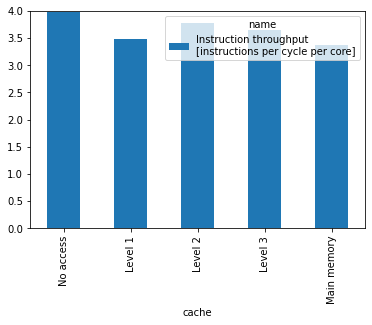

In [8]:
ipc_df = pd.DataFrame(plot_df.reset_index())

# filter out only ipc data
ipc_df = ipc_df.loc[ipc_df['name'] == INSTR_CYCLE]

ipc_df = ipc_df.pivot(index='cache', columns='name', values='value')

ax = ipc_df.plot.bar(stacked=True)
ax.set_ylim(0, 4)

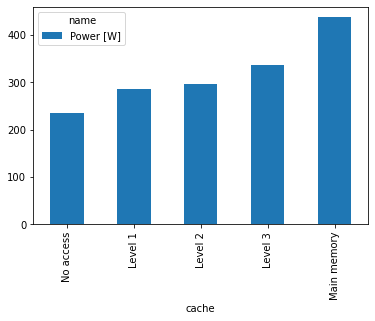

In [9]:
power_df = pd.DataFrame(plot_df.reset_index())

# filter out only power data
power_df = power_df.loc[(power_df['name'] == POWER)]

power_df = power_df.pivot(index='cache', columns='name', values='value')

ax = power_df.plot.bar(stacked=True)

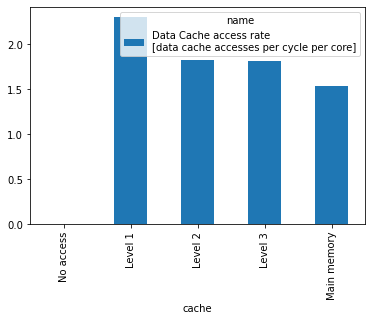

In [10]:
dc_df = pd.DataFrame(plot_df.reset_index())

# filter out only power data
dc_df = dc_df.loc[(dc_df['name'] == DC_CYCLE)]

dc_df = dc_df.pivot(index='cache', columns='name', values='value')

ax = dc_df.plot.bar(stacked=True)

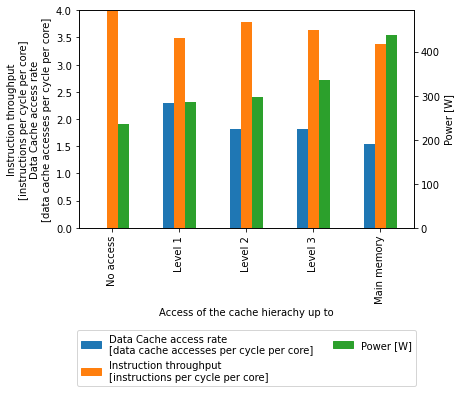

In [11]:
combined_df = pd.DataFrame(plot_df.reset_index())

# filter out relevant data
combined_df = combined_df.loc[(combined_df['name'] == DC_CYCLE) | (combined_df['name'] == POWER) | (combined_df['name'] == INSTR_CYCLE)]

mask = combined_df.name.isin([POWER])
scale = combined_df[~mask].value.mean() / float(combined_df[mask].value.mean())
combined_df.loc[mask, 'value'] = combined_df.loc[mask, 'value']*scale

combined_df = combined_df.pivot(index='cache', columns='name', values='value')

ax1 = combined_df.plot.bar()
ax1.set_ylim(0,4)

ax2 = ax1.twinx()

ax2.set_ylim(list(map(lambda l: l/scale, ax1.get_ylim())))

ax1.set_ylabel(INSTR_CYCLE + '\n' + DC_CYCLE)
ax2.set_ylabel(POWER)

handles = []
handles.append(mpatches.Patch(color=sns.color_palette()[0], label=DC_CYCLE))
handles.append(mpatches.Patch(color=sns.color_palette()[1], label=INSTR_CYCLE))
handles.append(mpatches.Patch(color=sns.color_palette()[2], label=POWER))
ax1.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5,-0.75), ncol=2)

ax1.set_xlabel('Access of the cache hierachy up to')

plt.savefig('../../paper/fig/conway_memory_accesses.pdf', bbox_inches='tight')